## Model perp
Thanks to https://github.com/keyurr2/face-detection where I got the model from. This time it is a caffe pre-trained model and it is in proto buffer (pb) format.

In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2

In [28]:
model = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt','res10_300x300_ssd_iter_140000.caffemodel')
img = cv2.imread('boys-286245_960_720.png') # the pic we detect on
base_img = img.copy() # the pic we will show our work on

In [29]:
original_size = img.shape
tartget_size = (300,300) # resize the img because the model accepts 300 x 300 img
print(original_size)

(640, 960, 3)


In [30]:
img = cv2.resize(img,tartget_size)
aspect_ratio_y = original_size[0] / tartget_size [0] #help us in to apply the work on base_img
aspect_ratio_x = original_size[1] / tartget_size[1]
print(aspect_ratio_x, aspect_ratio_y )
print(img.shape)

3.2 2.1333333333333333
(300, 300, 3)


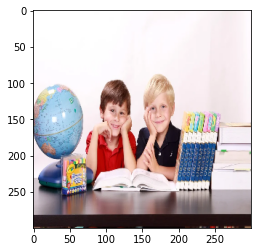

In [31]:
plt.imshow(img[:,:,::-1]); #original colors

In [32]:
imgblob= cv2.dnn.blobFromImage(img) #prepare img and returen 4-dim (1,3,300,300)
model.setInput(imgblob)
detections = model.forward()

In [33]:
detections[0][0].shape

(200, 7)

In [34]:
detections_df = pd.DataFrame(detections[0][0]
    , columns = ["img_id", "label", "confidence", "left", "top", "right", "bottom"])

In [35]:
detections_df.head() #inside the img all the detections are there.

,img_id,label,confidence,left,top,right,bottom
0,0.0,1.0,0.968530,0.332496,0.403738,0.437655,0.556170
1,0.0,1.0,0.913163,0.520982,0.378190,0.630141,0.552728
2,0.0,1.0,0.124081,4.160486,4.006558,4.842210,4.985181
3,0.0,1.0,0.121710,4.010251,0.129946,4.975087,0.882256
4,0.0,1.0,0.119973,0.023188,0.123822,0.990541,0.879998


In [36]:
detections_df = detections_df.query('confidence > 0.9 and label == 1.0') #label of 1 means face\ 0:means background
detections_df

,img_id,label,confidence,left,top,right,bottom
0,0.0,1.0,0.968530,0.332496,0.403738,0.437655,0.556170
1,0.0,1.0,0.913163,0.520982,0.378190,0.630141,0.552728


97%


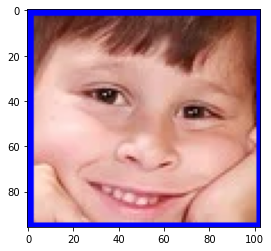

91%


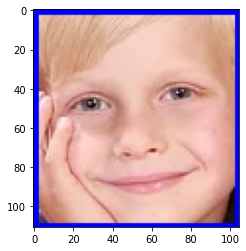

In [37]:
for i,instance in detections_df.iterrows():
    confidence = str(round(detections_df['confidence'][i]*100)) + "%"
    print(confidence)
    right = int(instance['right'] * 300) # multiply by 300 to see the results on the base_img remeber because we resize the img
    left = int(instance['left'] * 300)
    top = int(instance['top'] * 300)
    bottom = int(instance ['bottom'] * 300)
    detect_face = base_img[int(top *aspect_ratio_y): int(bottom*aspect_ratio_y), int(left*aspect_ratio_x): int(right*aspect_ratio_x)]
    if detect_face.shape[0] > 0 and detect_face.shape[1] > 0:
        cv2.putText(base_img, confidence , (int(left*aspect_ratio_x), int(top*aspect_ratio_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
        cv2.rectangle(base_img, (int(left*aspect_ratio_x), int(top*aspect_ratio_y)), (int(right*aspect_ratio_x), int(bottom*aspect_ratio_y)), (255, 0, 0), 4) #draw rectangle to main image
        plt.imshow(detect_face[:,:,::-1]) #original colors
        plt.show()
        
    


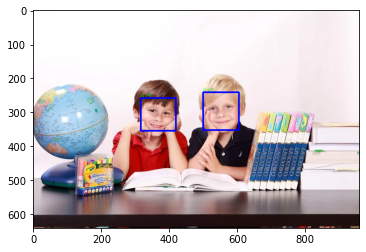

In [38]:
plt.imshow(base_img[:,:,::-1])